<a href="https://colab.research.google.com/github/Yupipapuu/Proyecto2/blob/main/Proyecto_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Proyecto 2.** Anális de base de datos

Alexander Emiliano Blanco Velázquez

Jorge Abi Pacheco Velasco

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#from google.colab import files
#df=files.upload()
#print(df)

link='https://github.com/Yupipapuu/Trabajos-THC/blob/main/Copia%20de%20ebola_2014_2016_clean%20-%20ebola_2014_2016_clean.csv'
code='?raw=true' #para que pandas lea el archivo csv y se pueda procesar
url=link+code # se unen el link y el código para leer el archivo
df = pd.read_csv(url, sep=',',index_col=1) #cargar archivo a la variable df

In [ ]:
df.head() #Encabezados

,Country,No. of confirmed cases,No. of confirmed deaths,Male Cases,Female Cases,Boys,Girls,Adult Male,Adult Female,Old Male,Old Female
Date,,,,,,,,,,,
29/08/2014,Guinea,482,287.0,289.2,192.8,86.76,57.84,173.52,115.68,28.92,19.28
29/08/2014,Nigeria,15,6.0,9.0,6.0,2.70,1.80,5.40,3.60,0.90,0.60
29/08/2014,Sierra Leone,935,380.0,561.0,374.0,168.30,112.20,336.60,224.40,56.10,37.40
29/08/2014,Liberia,322,225.0,193.2,128.8,57.96,38.64,115.92,77.28,19.32,12.88
05/09/2014,Guinea,604,362.0,362.4,241.6,108.72,72.48,217.44,144.96,36.24,24.16


In [ ]:
df.tail()

,Country,No. of confirmed cases,No. of confirmed deaths,Male Cases,Female Cases,Boys,Girls,Adult Male,Adult Female,Old Male,Old Female
Date,,,,,,,,,,,
23/03/2016,Liberia,3151,NaN,1890.6,1260.4,567.18,378.12,1134.36,756.24,189.06,126.04
23/03/2016,Italy,1,NaN,0.6,0.4,0.18,0.12,0.36,0.24,0.06,0.04
23/03/2016,Liberia,2,1.0,1.2,0.8,0.36,0.24,0.72,0.48,0.12,0.08
23/03/2016,Nigeria,19,7.0,11.4,7.6,3.42,2.28,6.84,4.56,1.14,0.76
23/03/2016,United States of America,4,1.0,2.4,1.6,0.72,0.48,1.44,0.96,0.24,0.16


In [ ]:
df.isnull().sum()

,0
Country,0
No. of confirmed cases,0
No. of confirmed deaths,836
Male Cases,0
Female Cases,0
Boys,0
Girls,0
Adult Male,0
Adult Female,0
Old Male,0


In [ ]:
#Contamos cuantos casos hay por pais para tener idea de cauntos datos faltantes hay
conteo=df.groupby(['Country']).size().reset_index(name='conteo')
conteo.sort_values('conteo',ascending=False)

,Country,conteo
2,Liberia,364
0,Guinea,259
6,Sierra Leone,259
4,Nigeria,255
5,Senegal,254
9,United States of America,245
3,Mali,243
7,Spain,243
8,United Kingdom,221
1,Italy,141


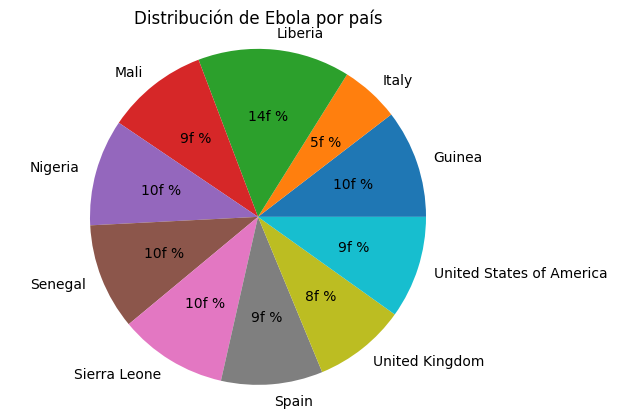

In [ ]:
plt.pie(conteo['conteo'],labels=conteo['Country'], autopct="%0.if %%")
plt.title("Distribución de Ebola por país")
plt.axis('equal')
plt.xticks(rotation=90,fontsize=8)
plt.savefig('ebola_pie.png', dpi=300, format='png')
plt.show()

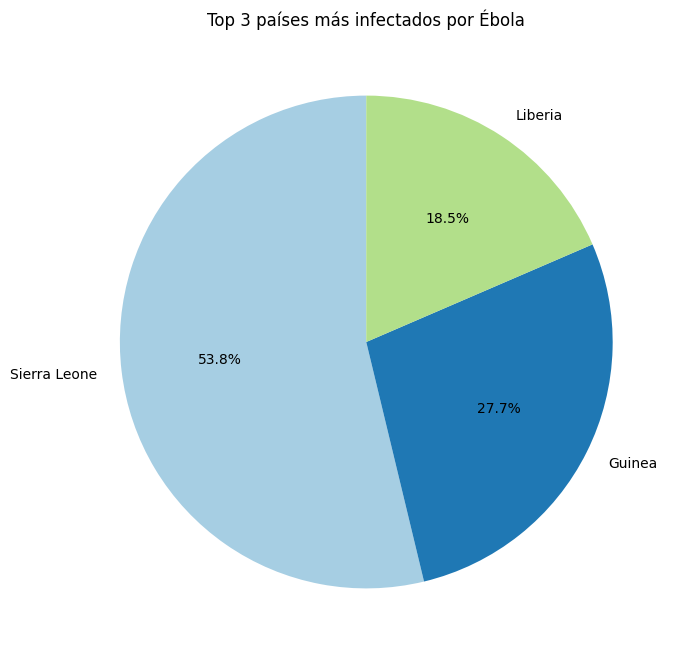

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Datos de ejemplo
data = {
    'Country': ['Guinea', 'Liberia', 'Sierra Leone', 'Nigeria', 'Senegal',
                'Mali', 'Spain', 'United States of America'],
    'No. of confirmed cases': [482, 322, 935, 15, 1, 7, 1, 4]
}

df = pd.DataFrame(data)

# Sumar los casos confirmados por país
country_totals = df.groupby('Country')['No. of confirmed cases'].sum()

# Ordenar por los países más infectados y seleccionar el top 3
top_3_countries = country_totals.sort_values(ascending=False).head(3)

# Crear gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(
    top_3_countries,
    labels=top_3_countries.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Paired.colors
)
plt.title('Top 3 países más infectados por Ébola')
plt.show()

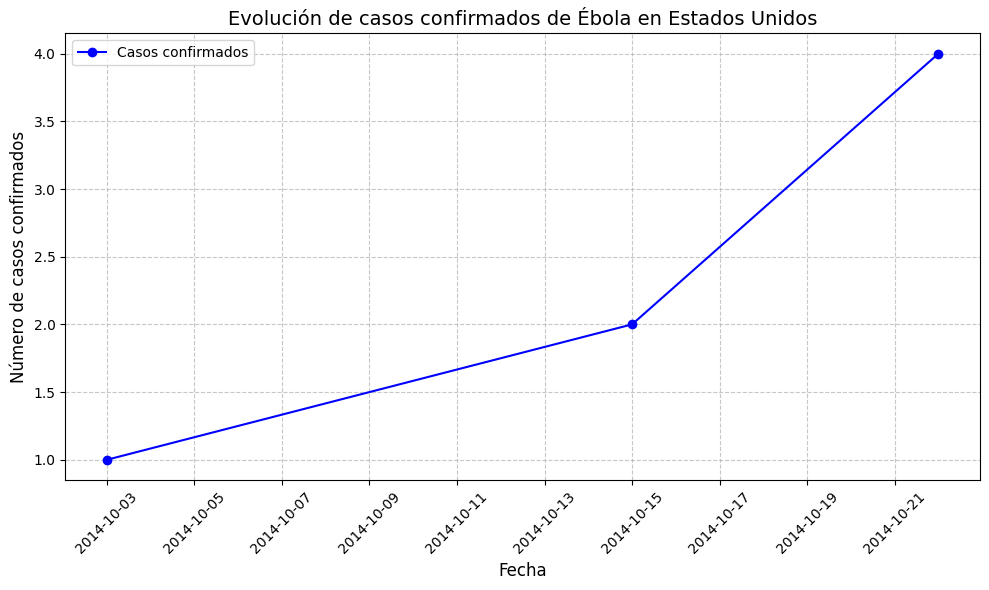

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Datos de ejemplo (reemplázalos con los datos extraídos del archivo)
data = {
    'Country': ['United States of America', 'United States of America', 'United States of America'],
    'Date': ['03/10/2014', '15/10/2014', '22/10/2014'],
    'No. of confirmed cases': [1, 2, 4]
}

# Convertir a DataFrame
df = pd.DataFrame(data)

# Filtrar los datos de Estados Unidos
usa_data = df[df['Country'] == 'United States of America']

# Convertir la columna 'Date' a formato de fecha
usa_data['Date'] = pd.to_datetime(usa_data['Date'], format='%d/%m/%Y')

# Ordenar por fecha
usa_data = usa_data.sort_values(by='Date')

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(usa_data['Date'], usa_data['No. of confirmed cases'], marker='o', color='blue', label='Casos confirmados')

# Personalización de la gráfica
plt.title('Evolución de casos confirmados de Ébola en Estados Unidos', fontsize=14)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Número de casos confirmados', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar la gráfica
plt.show()

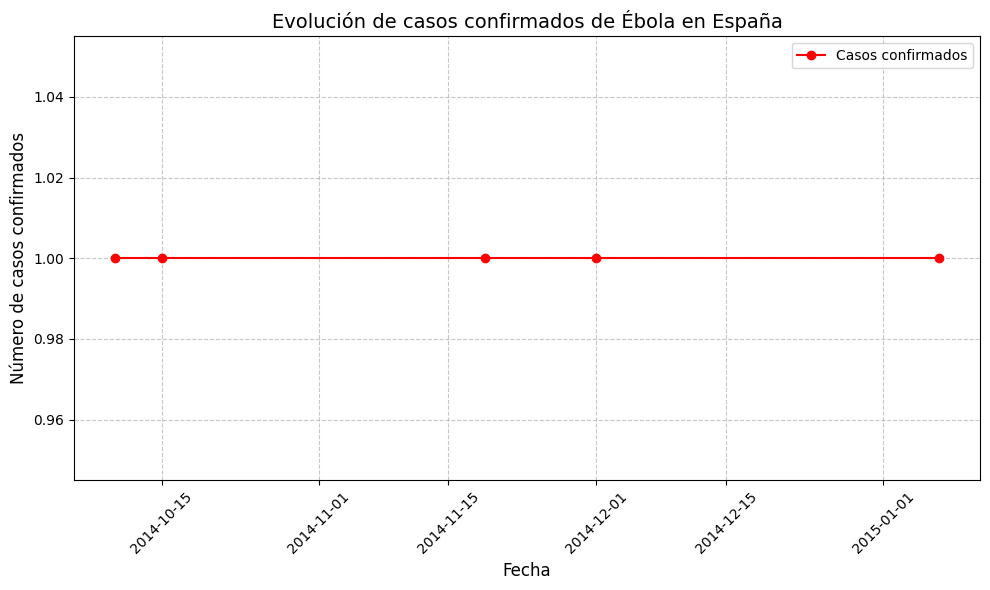

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Datos de ejemplo (reemplázalos con los datos reales extraídos del PDF)
data = {
    'Country': ['Spain', 'Spain', 'Spain', 'Spain', 'Spain'],
    'Date': ['10/10/2014', '15/10/2014', '19/11/2014', '01/12/2014', '07/01/2015'],
    'No. of confirmed cases': [1, 1, 1, 1, 1]
}

# Convertir los datos a un DataFrame
df = pd.DataFrame(data)

# Filtrar datos para España
spain_data = df[df['Country'] == 'Spain']

# Convertir la columna 'Date' a formato de fecha
spain_data['Date'] = pd.to_datetime(spain_data['Date'], format='%d/%m/%Y')

# Ordenar por fecha
spain_data = spain_data.sort_values(by='Date')

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(spain_data['Date'], spain_data['No. of confirmed cases'], marker='o', color='red', label='Casos confirmados')

# Personalización de la gráfica
plt.title('Evolución de casos confirmados de Ébola en España', fontsize=14)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Número de casos confirmados', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar la gráfica
plt.show()

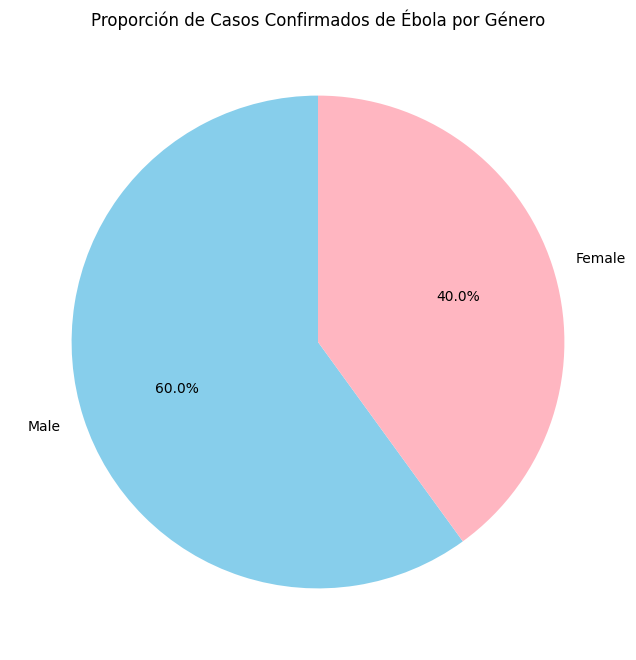

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Datos de ejemplo (reemplaza con los datos extraídos del archivo)
data = {
    'Male Cases': [289.2, 9, 561, 193.2, 11.4],
    'Female Cases': [192.8, 6, 374, 128.8, 7.6]
}

# Crear DataFrame
df = pd.DataFrame(data)

# Sumar los casos totales por género
male_total = df['Male Cases'].sum()
female_total = df['Female Cases'].sum()

# Preparar datos para el gráfico de pastel
labels = ['Male', 'Female']
sizes = [male_total, female_total]

# Crear gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=['skyblue', 'lightpink']
)
plt.title('Proporción de Casos Confirmados de Ébola por Género')
plt.show()

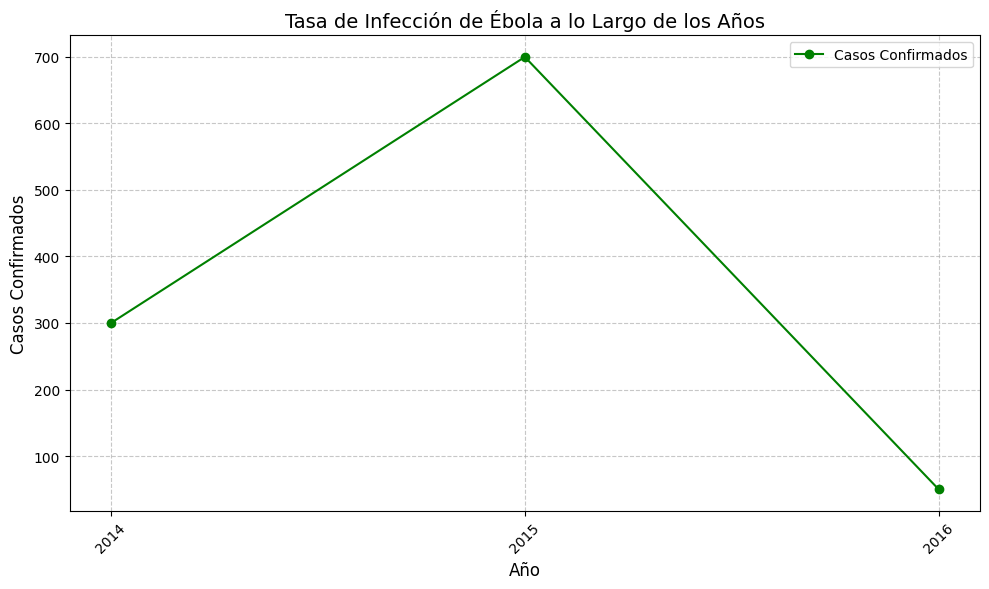

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Datos de ejemplo (reemplázalos con los datos reales extraídos del PDF)
data = {
    'Date': ['2014-01-01', '2014-05-01', '2015-01-01', '2015-06-01', '2016-01-01'],
    'Confirmed Cases': [100, 200, 400, 300, 50]
}

# Convertir a DataFrame
df = pd.DataFrame(data)

# Convertir la columna 'Date' a formato de fecha
df['Date'] = pd.to_datetime(df['Date'])

# Extraer el año de la fecha
df['Year'] = df['Date'].dt.year

# Agrupar por año y sumar los casos confirmados
yearly_cases = df.groupby('Year')['Confirmed Cases'].sum()

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(yearly_cases.index, yearly_cases.values, marker='o', color='green', label='Casos Confirmados')

# Personalización de la gráfica
plt.title('Tasa de Infección de Ébola a lo Largo de los Años', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Casos Confirmados', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(yearly_cases.index, rotation=45)
plt.legend()
plt.tight_layout()

# Mostrar la gráfica
plt.show()

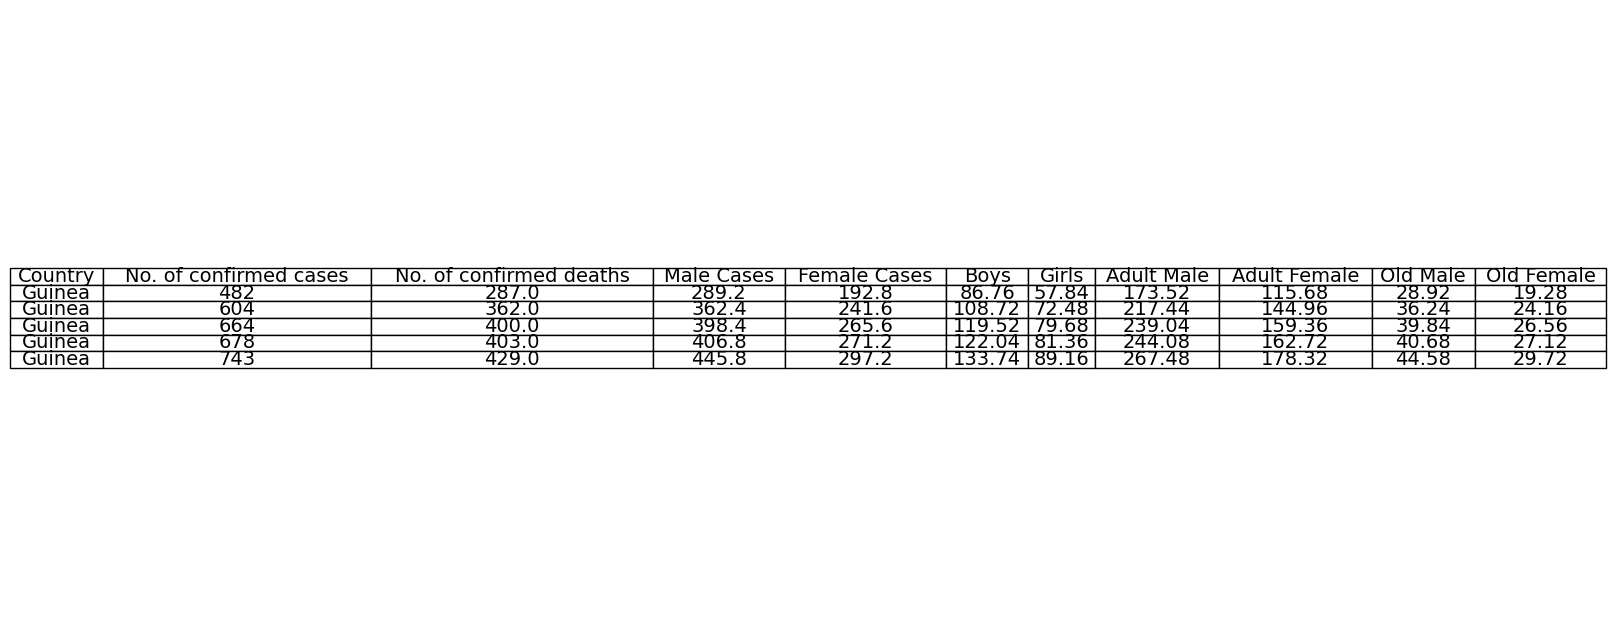

In [ ]:
Guinea = df[df['Country'] == 'Guinea']
tabla = Guinea.head()


fig, ax = plt.subplots(figsize=(16, 8))
ax.axis('tight')  #tamaño de la columna estrecho
ax.axis('off')  # Eliminar ejes

#dibujar la tabla
table = ax.table(cellText=tabla.values, colLabels=tabla.columns, loc='center', cellLoc='center')

# Ajustar el tamaño de la fuente de la tabla
table.auto_set_font_size(False)
table.set_fontsize(14)  # Ajustar según sea necesario

# Ajustar automáticamente el ancho de las columnas para que no se corten
table.auto_set_column_width(col=list(range(len(tabla.columns))))


plt.savefig("tabla_Guinea.jpg", dpi=600, bbox_inches="tight")
plt.show()
plt.close()

In [ ]:
Guinea.describe()

,No. of confirmed cases,No. of confirmed deaths,Male Cases,Female Cases,Boys,Girls,Adult Male,Adult Female,Old Male,Old Female
count,259.000000,257.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000
mean,2894.293436,1794.595331,1736.576062,1157.717375,520.972819,347.315212,1041.945637,694.630425,173.657606,115.771737
std,680.007101,435.855453,408.004261,272.002840,122.401278,81.600852,244.802556,163.201704,40.800426,27.200284
min,482.000000,287.000000,289.200000,192.800000,86.760000,57.840000,173.520000,115.680000,28.920000,19.280000
25%,2674.000000,1651.000000,1604.400000,1069.600000,481.320000,320.880000,962.640000,641.760000,160.440000,106.960000
50%,3216.000000,2009.000000,1929.600000,1286.400000,578.880000,385.920000,1157.760000,771.840000,192.960000,128.640000
75%,3336.000000,2076.000000,2001.600000,1334.400000,600.480000,400.320000,1200.960000,800.640000,200.160000,133.440000
max,3351.000000,2083.000000,2010.600000,1340.400000,603.180000,402.120000,1206.360000,804.240000,201.060000,134.040000


In [ ]:
mean_value = Guinea['No. of confirmed deaths'].mean()
Guinea.fillna(mean_value, inplace=True)
Guinea.isnull().sum()

<ipython-input-11-3ef001847e61>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Guinea.fillna(mean_value, inplace=True)


,0
Country,0
No. of confirmed cases,0
No. of confirmed deaths,0
Male Cases,0
Female Cases,0
Boys,0
Girls,0
Adult Male,0
Adult Female,0
Old Male,0


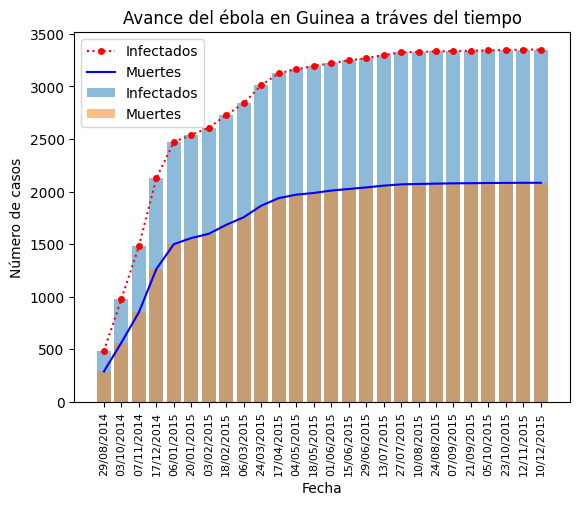

In [ ]:
Guinea_infectados=Guinea['No. of confirmed cases'][0:-1:10]
Guinea_muertes=Guinea['No. of confirmed deaths'][0:-1:10]
fechas=Guinea.index[0:-1:10]
plt.plot(fechas,Guinea_infectados, 'o:r', ms=4, label='Infectados')
plt.bar(fechas,Guinea_infectados, alpha=0.5, label='Infectados')
plt.plot(fechas,Guinea_muertes, '-b', ms=4, label='Muertes')
plt.bar(fechas,Guinea_muertes, alpha=0.5, label='Muertes')
plt.title('Avance del ébola en Guinea a tráves del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Número de casos')
plt.legend()
plt.savefig('ebola_guinea.png', dpi=300, format='png')
plt.xticks(rotation=90,fontsize=8)

plt.savefig('ebola_guinea.png', dpi=300, format='png')
plt.xticks(rotation=90,fontsize=8)
plt.show()

In [ ]:
plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

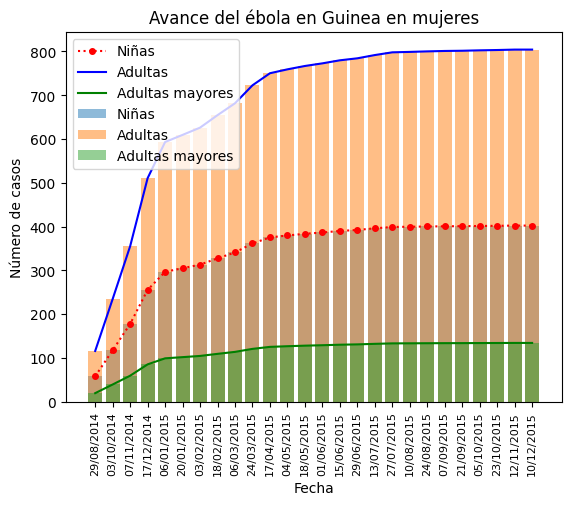

In [ ]:
Guinea_She=Guinea['Girls'][0:-1:10]
Guinea_Af=Guinea['Adult Female'][0:-1:10]
Guinea_Of=Guinea['Old Female'][0:-1:10]
fechas=Guinea.index[0:-1:10]

plt.plot(fechas,Guinea_She, 'o:r', ms=4, label='Niñas')
plt.bar(fechas,Guinea_She, alpha=0.5, label='Niñas')
plt.plot(fechas,Guinea_Af, '-b', ms=4, label='Adultas')
plt.bar(fechas,Guinea_Af, alpha=0.5, label='Adultas')
plt.plot(fechas,Guinea_Of, '-g', ms=4, label='Adultas mayores')
plt.bar(fechas,Guinea_Of, alpha=0.5, label='Adultas mayores')
plt.title('Avance del ébola en Guinea en mujeres')
plt.xlabel('Fecha')
plt.ylabel('Número de casos')
plt.legend()
plt.savefig('ebola_guinea_age_female.png', dpi=300, format='png')
plt.xticks(rotation=90,fontsize=8)
plt.show()

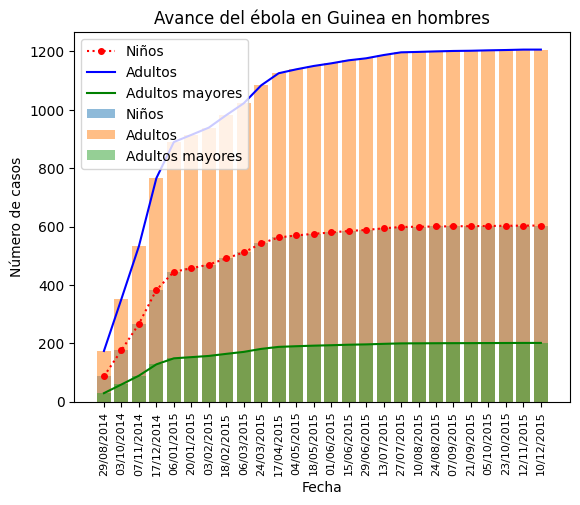

In [ ]:
Guinea_boy=Guinea['Boys'][0:-1:10]
Guinea_Am=Guinea['Adult Male'][0:-1:10]
Guinea_Om=Guinea['Old Male'][0:-1:10]
fechas=Guinea.index[0:-1:10]
plt.plot(fechas,Guinea_boy, 'o:r', ms=4, label='Niños')
plt.bar(fechas,Guinea_boy, alpha=0.5, label='Niños')
plt.plot(fechas,Guinea_Am, '-b', ms=4, label='Adultos')
plt.bar(fechas,Guinea_Am, alpha=0.5, label='Adultos')
plt.plot(fechas,Guinea_Om, '-g', ms=4, label='Adultos mayores')
plt.bar(fechas,Guinea_Om, alpha=0.5, label='Adultos mayores')
plt.title('Avance del ébola en Guinea en hombres')
plt.xlabel('Fecha')
plt.ylabel('Número de casos')
plt.legend()
plt.savefig('ebola_guinea_age.png', dpi=300, format='png')
plt.xticks(rotation=90,fontsize=8)
plt.show()